<a href="https://colab.research.google.com/github/YMGYM/xai_wikibooks_study/blob/main/wikibooks_xai_bookch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. 대리 분석

## 5-1 대리 분석 개론

- XAI에서 대리 분석은 본래 인공지능 모델이 너무 복잡해서 분석이 불가능할 때 유사한 기능을 흉내 내는 인공지능 모델 여러 개를 대리로 만들어서 본래 모델을 분석하는 기법을 말한다.
- 분석해야 할 모델을 f라 하자, 대리 분석 모델을 흉내 내는 모델 g를 만든다.
- f와 g는 학습 방식이 다를 수도 있다.
- g의 조건 : (1) 모델 f보다 학습하기 쉽고 (2) 설명 가능하며, (3) 모델 f를 유사하게 흉내낼 수 있으면 된다.

모델 g를 학습시키는 과정은 두 가지
- f를 학습시키는 전부를 g를 학습하는 데 사용 => 글로벌 대리 분석(Global Surrogate Analysis)
- 데이터 라벨별 / 데이터의 일부만 추려서 g를 학습시키는 것 => 로컬 대리 분석(Local Surrogate Analysis)

이 과정을 수행하면 모델 g는 f보다 정확도가 뜰어지지만, f를 대변할 수 있다.

대리 분석법의 장점
- 모델 애그노스틱(model-agnostic technology) - 모델에 대한 지식 없어도 학습할 수 있음
- 적은 학습 데이터로도 설명 가능
- 예측 모델 f가 바뀌더라도 피처만 같다면 대리 분석이 가능하다.

### 5-1-1 글로벌 대리 분석

- 전체 학습 데이터를 사용해 블랙박스 함수 f를 따라하는 유사 함수 g를 만들고, g를 해석 가능하도록 변조하는 방법
- g는 설명 가능해야한다. (의사 결정 트리, 선형 회귀, 로지스틱 회귀, 나이브 베이즈, KNN알고리즘)

|알고리즘|선형성|단조함수 유무|PDP Interaction|목표|
|---|---:|---:|---:|---:|
|선형 회귀|있음|단조함수|불가능|회귀|
|로지스틱 회귀|없음|단조함수|불가능|분류|
|의사 결정 트리|없음|일부|가능|분류, 회귀|
|나이브 베이즈|없음|단조함수|불가능|분류|
|KNN|없음|단조함수 아님|불가능|분류, 회귀|

**글로벌 대리 분석을 수행하는 과정**은 다음과 같다.

1. 데이터 집합 X를 선택한다. (학습 데이터 전체 또는 일부)
2. X에 대해 블랙박스 모델 f의 예측 결과를 구한다.
3. XAI 모델을 고른다. 이를 학습시킨 것을 g라고 부른다.
4. 모델 g는 설명 가능해야한다.
5. 데이터 집합 X로 g를 학습시킨다.
6. X에 대해 f와 g를 비교하면서 두 모델이 최대한 유사한 결과를 내도록 튜닝한다.
7. g를 XAI기법을 사용해 해석한다.

6번과정에서 R-Square 방식으로 측정한다.

$ R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{  \sum^{n}_{i=1}   ( \hat{y}^{(i)}_* - \hat{y}^{(i)})^2}{ \sum^{n}_{i=1}( \hat{y}^{(i)} - \underline{\hat{y}})^2}$


- $ \hat{y}^{(i)}_* $ 는 모델 g가 i번째 데이터를 예측한 결과
- $ \hat{y}^{(i)} $ 는 모델f가 i번째 데이터를 예측한 결과
- $ \underline{\hat{y}} $ 는 모델 f의 예측 결과 평균
- R-square가 1에 가까울수록 g가 f를 제대로 흉내내는 정도다.


**글로벌 대리 분석의 장점**
- 유연하다. (매제 함수를 가지고 f가 어떻게 학습됐는지 설명할 수 있다.)
- 직관적이다.(원래 모델을 유사하게 따라 하는 대리 모형을 찾을 수 있다면 큰 힘을 들이지 않고도 해석 가능하다.)

**글로벌 대리 분석의 단점**
- f를 간접적으로 설명 => g모델의 정확도와 g모델의 해석 방향에 결함이 있을 수 있다.
- 메저 함수의 설명 가능성 판단 기준이 주관적이다 (XAI의 신뢰도가 주관적이다)
- 데이터가 편향됐을 위험이 있다.

### 5-1-2 로컬 대리 분석

- 데이터 하나에 대해 블랙박스가 해석하는 과정을 분석하는 기법
- LIME(Local Interpretable Model-agnostic Explanations) 으로 더 잘 알려져 있다.

## 5-2 LIME

- LIME은 모델이 현재 데이터의 어떤 영역을 집중해서 분석했고, 어떤 영역을 분류 근거로 사용했는지 알려 주는 XAI기법이다.
- LIME은 모델 학습 방법과 관계 없이 적용할 수 있는 XAI이다.

### 5-2-2 배경 이론

- LIME은 입력 데이터에 대해 부분적으로 변화를 준다 (perturbation) 또는 (sample permutation)이라고 한다.

이미지 인식 모델로 예시
- 입력 이미지에 대해 해석 가능하도록 인식 단위를 쪼개고 이미지를 해석한다.
- 이렇게 나뉜 영역을 조합해서 원본 모델이 대상을 가장 잘 분류할 수 있게 대표 이미지 구성
- 이미지 특정 관심 영역을 $x$라 하고, 이를 중심으로 $x$ 와 동일한 정보를 가지고 있다고 간주할 수 있늘 영역을 $\pi_x$라 한다.
- 이때 $\pi_x$를 슈퍼픽셀(super pixel)이라고 한다.
- $\pi_x$의 마스킹정보 $m_x$를 받아 $f(\pi_x)$와 동일한 값을 반환하도록 학습한 해석 가능한 모델을 g라 하자.
- g는 $\pi_x$ 가 f가 예측하는데 얼마만큼 영향을 미치는지를 선형 결합 모델로 예측

$ explanation(x) = argminL(f, g, \pi_x) $

- L은 손실 함수로 f와g의 검증 결과를 비교해 유사성을 파악한다.

- LIME은 손실 함수가 최저가 되게 하는 슈퍼 픽셀 조합을 찾는다.
- 가장 영향을 많이 끼치는 슈퍼 픽셀을 최종 선택하고, g를 학습시킨다.

**LIME의 장점**
- 머신러닝 알고리즘에 관계없이 XAI적용 가능
- 딥러닝, 그래픽카드 등을 사용하지 않아도 사용 가능
- 매트릭스로 표현 가능한 데이터에 대해 작동하는 XAI기법이다
- 다른 XAI 기법과 비교했을 때 매우 가볍다

**LIME의 단점**
- 방법이 비결정적(Non-deterministic)이고, 랜덤한 결과를 반환할 수 있다.
- 데이터 하나에 대해 설명을 하기 때문에 일관성을 보전하지 못한다. => 서브모듈러 픽 방법 사용 가능

### 5-2-3 실습2 : 텍스트 데이터에 LIME 적용하기

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# 클래스 이름 줄이기
class_names = [x.split('.')[-1] if 'misc' not in x else '.'.join(x.split('.')[-2:]) for x in newsgroups_train.target_names]


class_names[3] = 'pc.hardware'
class_names[4] = 'mac.hardware'

print(class_names)


['atheism', 'graphics', 'ms-windows.misc', 'pc.hardware', 'mac.hardware', 'x', 'misc.forsale', 'autos', 'motorcycles', 'baseball', 'hockey', 'crypt', 'electronics', 'med', 'space', 'christian', 'guns', 'mideast', 'politics.misc', 'religion.misc']


In [ ]:
# 카테고리 분류 모델
import sklearn
import sklearn.metrics
from sklearn.naive_bayes import MultinomialNB

# TF-IDF를 사용해 문서를 숫자 벡터로 변환
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

In [ ]:
# 모델 학습
nb = MultinomialNB(alpha = .01) # 단어가 학습 모델의 단어 사용빈도와 비교했을때 얼마나 가까운지 확률적으로 비교한다.
nb.fit(train_vectors, newsgroups_train.target)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [ ]:
# 테스트하고 f-1 점수
pred = nb.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='weighted')

0.8350184193998174

학습한 모델에 LIME을 적용하고 하이라이트 표시를 해 본다.

sklearn 패키지의 파이프라인 기능을 사용할 것이다.

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(vectorizer, nb)

predict_classes = pipe.predict_proba([newsgroups_test.data[0]]).round(3)[0]

print(predict_classes) # 테스트 데이터 0번이 각 카테고리에 속할 확률 표시

[0.001 0.01  0.003 0.047 0.006 0.002 0.003 0.521 0.022 0.008 0.025 0.
 0.331 0.003 0.006 0.    0.003 0.    0.001 0.009]


In [ ]:
# 가독성 높은 표현
rank = sorted(range(len(predict_classes)),
              key=lambda i: predict_classes[i],
              reverse=True)

for rank_index in rank:
  print(f"[{rank.index(rank_index) + 1:>5}]\t{rank_index:<3}\tclass({predict_classes[rank_index]:.1%})")

[    1]	7  	class(52.1%)
[    2]	12 	class(33.1%)
[    3]	3  	class(4.7%)
[    4]	10 	class(2.5%)
[    5]	8  	class(2.2%)
[    6]	1  	class(1.0%)
[    7]	19 	class(0.9%)
[    8]	9  	class(0.8%)
[    9]	4  	class(0.6%)
[   10]	14 	class(0.6%)
[   11]	2  	class(0.3%)
[   12]	6  	class(0.3%)
[   13]	13 	class(0.3%)
[   14]	16 	class(0.3%)
[   15]	5  	class(0.2%)
[   16]	0  	class(0.1%)
[   17]	18 	class(0.1%)
[   18]	11 	class(0.0%)
[   19]	15 	class(0.0%)
[   20]	17 	class(0.0%)


python LIME구현체는 기본적으로 다음 기능을 제공한다.

- 텍스트 설명체
- 이미지 설명체
- 테이블 분류
- 선형 공간 모듈
- 이산 모듈(사용자 커스텀 가능)
- 설명 모듈(사용자 커스텀 가능)

In [ ]:
!pip install lime

In [ ]:
# 텍스트 설명체를 선언

from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names = class_names)

`explain_instance()` 는 입력받은 데이터의 일부 벡터를 변형해서 분류기 출력 결과가 달라지는지를 추적하고, 이를 모사하는 선형 모델을 만든다.

이 선형 모델의 분류 기준이 경계가 될 것이다.

In [ ]:
exp = explainer.explain_instance(newsgroups_test.data[0], # 해석하고 싶은 데이터
                                 pipe.predict_proba, # 모사할 모델
                                 top_labels=1) # 분류 가능성이 높은 클래스를 몇개 보여줄 것인지

In [ ]:
exp.available_labels() # 잘 학습됐는지 확인

[7]

In [ ]:
exp.show_in_notebook(text=newsgroups_test.data[0])

`88-89` 와 `SE`가 자동차 카테고리를 결정하는 서브모듈러로 표시된다.

인터넷으로 검색해 보면 `88-89 본네빌`은 차량 명이며, `SE`, `LE` 는 에디션 정보이다.

In [ ]:
# 다른 데이터에 대해서도 분석
idx = 5

explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(newsgroups_test.data[idx], pipe.predict_proba, top_labels=1)

predict_classes = pipe.predict_proba([newsgroups_test.data[idx]]).round(3)[0]

rank = sorted(range(len(predict_classes)), key=lambda i: predict_classes[i], reverse=True)

print('Document id: ', idx)
print('Predicted class: ', class_names[nb.predict(test_vectors[idx]).reshape(1,-1)[0,0]])

print('True class: ', class_names[newsgroups_test.target[idx]])
print(predict_classes)
print(rank)


print("explanation for class ", class_names[rank[0]])
print("\n".join(map(str, exp.as_list(rank[0]))))


exp.show_in_notebook(text=newsgroups_test.data[idx])

Document id:  5
Predicted class:  med
True class:  med
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19]
explanation for class  med
('yeast', 0.001689385642234235)
('candida', 0.0016665031551770274)
('infection', 0.0016314078748939015)
('fungus', 0.0015519150520609873)
('infections', 0.001456807845983041)
('Candida', 0.0014342666601576473)
('systemic', 0.0013003485262132106)
('biochemist', 0.0011885091366853628)
('ocom', 0.0011797392984970226)
('was', 0.00020175963113546095)


LIME의 하이라이트 부분을 근거로 모델의 판단 근거를 확인할 수 있었다.

### 5-2-4 실습3: 이미지 데이터에 LIME 적용하기

Olivetti faces 데이터셋을 사용할 것이다. 40명의 얼굴을 각각 10장씩 촬영한 데이터셋이다.

In [ ]:
!pip install scikit-image -q

     |████████████████████████████████| 29.2MB 148kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray
from skimage.util import montage
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

In [ ]:
# 이미지를 흑백으로 만들고 LIME이 처리할 수 있는 형태로 변환하기
X_vec = np.stack([gray2rgb(iimg) for iimg in faces.data.reshape((-1, 64, 64))], 0)
y_vec = faces.target.astype(np.uint8)

(-0.5, 1279.5, 1279.5, -0.5)

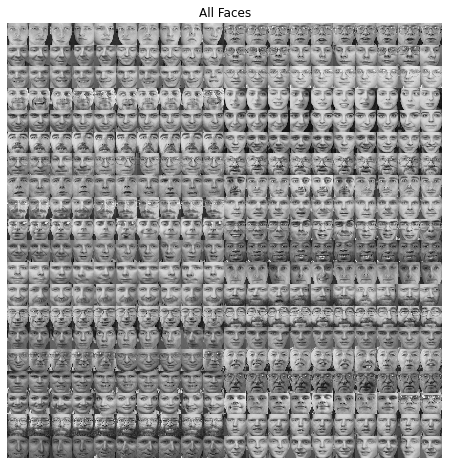

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
ax1.imshow(montage(X_vec[:,:,:,0]), cmap='gray', interpolation="none")
ax1.set_title("All Faces")
ax1.axis('off')

In [ ]:
y_vec

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

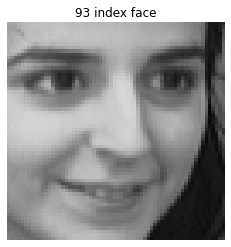

In [ ]:
index = 93
plt.imshow(X_vec[index], cmap='gray')
plt.title(f"{index} index face")
plt.axis('Off')

plt.show()

모델을 학습해 본다.

LIME의 설명체 파라미터로 필요한 것
- 설명이 필요한 데이터 하나
- 해당 데이터에 대한 분류 확률을 출력하는 메소드

In [ ]:
# 퍼셉트론 네트워크를 사용해 분류
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, train_size=0.70) 

In [ ]:
# 이미지 전처리 수행
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

class PipeStep(object):
  def __init__(self, step_func):
    self._step_func = step_func

  def fit(self, *args):
    return self
  
  def transform(self, X):
    return self._step_func(X)


  
makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list]) # 넘파이의 flatten => ravel()

simple_pipeline = Pipeline([
      ("Make Gray", makegray_step),
      ("Flatten Image", flatten_step),
      ('MLP', MLPClassifier(
          activation='relu',
          hidden_layer_sizes=(400, 40),
          random_state=1
      ))
])

In [ ]:
# 모델 학습
simple_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('Make Gray', <__main__.PipeStep object at 0x7fbde03b6310>),
                ('Flatten Image', <__main__.PipeStep object at 0x7fbde03b63d0>),
                ('MLP',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(400, 40),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [ ]:
# 정확도 체크
pipe_pred_test = simple_pipeline.predict(X_test)
pipe_pred_prob = simple_pipeline.predict_proba(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred = pipe_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.60      0.75         5
           2       0.33      0.50      0.40         2
           3       1.00      0.50      0.67         2
           4       0.75      0.60      0.67         5
           5       1.00      0.60      0.75         5
           6       1.00      0.50      0.67         4
           7       0.30      0.75      0.43         4
           8       0.50      0.25      0.33         4
           9       0.40      0.50      0.44         4
          10       1.00      1.00      1.00         3
          11       0.50      0.50      0.50         2
          12       0.00      0.00      0.00         1
          13       0.67      1.00      0.80         2
          14       0.20      0.50      0.29         2
          15       0.75      0.60      0.67         5
          16       1.00      1.00      1.00         2
          17       0.75    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정확도가 50% 정도로 상당히 낮은 모습을 보인다.

In [ ]:
# 전처리에 정규화 과정 추가
# 이미지 전처리 수행
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Normalizer

class PipeStep(object):
  def __init__(self, step_func):
    self._step_func = step_func

  def fit(self, *args):
    return self
  
  def transform(self, X):
    return self._step_func(X)


  
makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list]) # 넘파이의 flatten => ravel()

simple_pipeline = Pipeline([
      ("Make Gray", makegray_step),
      ("Flatten Image", flatten_step),
      ("Normalize", Normalizer()),
      ('MLP', MLPClassifier(
          activation='relu',
          hidden_layer_sizes=(400, 40),
          random_state=1
      ))
])

In [ ]:
simple_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('Make Gray', <__main__.PipeStep object at 0x7fbde03c8e50>),
                ('Flatten Image', <__main__.PipeStep object at 0x7fbde03c8f10>),
                ('Normalize', Normalizer(copy=True, norm='l2')),
                ('MLP',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(400, 40),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=F

In [ ]:
pipe_pred_test = simple_pipeline.predict(X_test)
pipe_pred_prob = simple_pipeline.predict_proba(X_test)


print(classification_report(y_true=y_test, y_pred = pipe_pred_test))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       1.00      1.00      1.00         5
           2       1.00      0.50      0.67         2
           3       0.50      0.50      0.50         2
           4       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         5
           6       1.00      0.50      0.67         4
           7       1.00      0.75      0.86         4
           8       1.00      0.25      0.40         4
           9       0.75      0.75      0.75         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         1
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2
          15       1.00      0.80      0.89         5
          16       0.67      1.00      0.80         2
          17       1.00    

f1-점수가 매우 많이 오른 것을 확인할 수 있었다.

In [ ]:
# 저자가 찾은 최적 파이프라인
imple_pipeline = Pipeline([
      ("Make Gray", makegray_step),
      ("Flatten Image", flatten_step),
      ("Normalize", Normalizer()),
      ('MLP', MLPClassifier(
          activation='relu',
          alpha=1e-7,
          epsilon=1e-6,
          hidden_layer_sizes=(800, 120),
          random_state=1
      ))
])

simple_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('Make Gray', <__main__.PipeStep object at 0x7fbde03c8e50>),
                ('Flatten Image', <__main__.PipeStep object at 0x7fbde03c8f10>),
                ('Normalize', Normalizer(copy=True, norm='l2')),
                ('MLP',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(400, 40),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=F

In [ ]:
from sklearn.metrics import classification_report
pipe_pred_test = simple_pipeline.predict(X_test)
pipe_pred_prob = simple_pipeline.predict_proba(X_test)

print(classification_report(y_true=y_test, y_pred = pipe_pred_test))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       1.00      1.00      1.00         5
           2       1.00      0.50      0.67         2
           3       0.50      0.50      0.50         2
           4       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         5
           6       1.00      0.50      0.67         4
           7       1.00      0.75      0.86         4
           8       1.00      0.25      0.40         4
           9       0.75      0.75      0.75         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         1
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2
          15       1.00      0.80      0.89         5
          16       0.67      1.00      0.80         2
          17       1.00    

정확도가 상당히 올라간 것을 확인할 수 있지만 17번이나 20번 인물의 경우는 정확도가 낮다.

이 경우 모델이 인물을 어떻게 인식하는지 확인해 보자

이미지 데이터 설명 모델은 파라미터에 따라서 성능이 크게 달라진다.
- 설명 모델은 `model_regressor` 파라미터를 수정하면 된다.
- 서브모듈 모델은 `segmentation_fn` 을 수정하면 된다.

In [ ]:
# 이미지 설명체와 분할 알고리즘 선언
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

explainer = lime_image.LimeImageExplainer()

# 이미지 분할 알고리즘의 종류 : quickshift(기본), slic, felzenszwalb
segmenter = SegmentationAlgorithm('slic',
                                  n_segments=100, # 이미지 분할 조각 개수
                                  compactness=1, # 분할된 이미지 조각으로부터 유사한 파트를 합치는 함수 (로그스케일)
                                  sigma=1) #분할한 이미지의 스무딩 정도

In [ ]:
%%time

olivetti_test_index=0 # 테스트 데이터 21번을 확인한다.

exp = explainer.explain_instance(
    X_test[olivetti_test_index], 
    classifier_fn = simple_pipeline.predict_proba,
    top_labels=6,                 # 1등부터 6등까지의 분류 값을 분석하겠다는 의미
    num_samples=1000,             
    segmentation_fn=segmenter

)

/usr/local/lib/python3.7/dist-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)



CPU times: user 2.44 s, sys: 934 ms, total: 3.37 s
Wall time: 2.01 s


In [ ]:
pipe_pred_test = simple_pipeline.predict(X_test)
pipe_pred_prob = simple_pipeline.predict_proba(X_test)

print(classification_report(y_true=y_test, y_pred = pipe_pred_test))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       1.00      1.00      1.00         5
           2       1.00      0.50      0.67         2
           3       0.50      0.50      0.50         2
           4       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         5
           6       1.00      0.50      0.67         4
           7       1.00      0.75      0.86         4
           8       1.00      0.25      0.40         4
           9       0.75      0.75      0.75         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         1
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2
          15       1.00      0.80      0.89         5
          16       0.67      1.00      0.80         2
          17       1.00    

Text(0.5, 1.0, 'Show mask only')

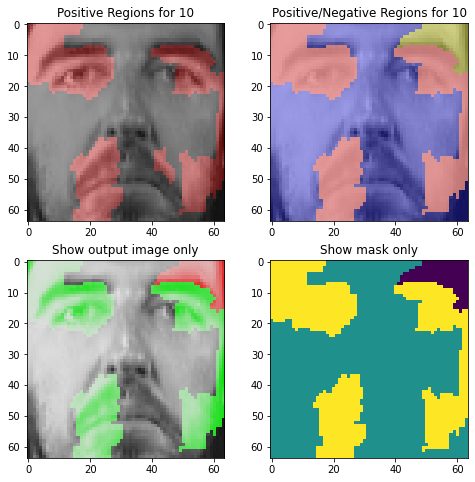

In [ ]:
from skimage.color import label2rgb # 이미지 위에 형광색 마스킹을 할 때 표시


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

# 예측에 도움이 되는 세그면트 출력하기
temp, mask = exp.get_image_and_mask(y_test[olivetti_test_index], # 이미지 원본
                                    positive_only=True, # positive만 출력한다.
                                    num_features=8, # 분할 영역의 크기
                                    hide_rest=False) # 도움이 되는 서브모듈만 출력하는가

ax1.imshow(label2rgb(mask, temp, bg_label=0),
           interpolation='nearest')

ax1.set_title(f"Positive Regions for {y_test[olivetti_test_index]}")

# 모든 세그먼트 출력
temp, mask = exp.get_image_and_mask(y_test[olivetti_test_index], # 이미지 원본
                                    positive_only=False, # positive만 출력한다.
                                    num_features=8, # 분할 영역의 크기
                                    hide_rest=False) # 도움이 되는 서브모듈만 출력하는가

ax2.imshow(label2rgb(4 - mask, temp, bg_label=0),
           interpolation='nearest')

ax2.set_title(f"Positive/Negative Regions for {y_test[olivetti_test_index]}")

# 이미지만 출력
ax3.imshow(temp, interpolation='nearest')
ax3.set_title('Show output image only')

# 마스크만 출력
ax4.imshow(mask, interpolation='nearest')
ax4.set_title('Show mask only')

- ax1: 설명 모델이 가장 높은 확률로 분류한 라벨에 도움이 되는 이미지 영역
- ax2: 모든 이미지 조각 마킹 레이블
- ax3: 설명 모델이 유용하게 사용한 이미지 조각만을 출력
- ax4: 분할 영역을 정수형 타입으로 시각화

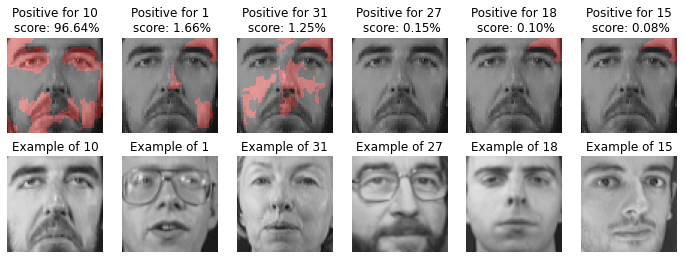

In [ ]:
# 하나의 인물에 대한 부가 설명을 출력

olivetti_test_index=0

fig, m_axs = plt.subplots(2, 6, figsize=(12, 4))

for i, (c_ax, gt_ax) in zip(exp.top_labels, m_axs.T):
  temp, mask = exp.get_image_and_mask(i,
                                      positive_only=True,
                                      num_features=12,
                                      hide_rest=False,
                                      min_weight=0.001)
  
  c_ax.imshow(label2rgb(mask, temp, bg_label = 0), interpolation='nearest')

  c_ax.set_title(f"Positive for {i}\n score: {(100*pipe_pred_prob[olivetti_test_index, i]):.2f}%")
  c_ax.axis('off')


  face_id = np.random.choice(np.where(y_train==i)[0])

  gt_ax.imshow(X_train[face_id])
  gt_ax.set_title(f"Example of {i}")
  gt_ax.axis('off')

9번 인물의 눈과 코, 입을 중점적으로 파악했다.

In [ ]:
pipe_pred_prob[10]

array([1.49508745e-02, 3.00793774e-05, 3.68461029e-04, 8.39823016e-04,
       5.35714848e-07, 4.62931087e-08, 1.97429818e-04, 9.65154119e-01,
       1.13173439e-08, 6.83239934e-03, 1.49987219e-03, 1.42962945e-07,
       2.02510444e-07, 5.29060359e-06, 8.13606248e-06, 8.21392340e-04,
       7.48717031e-06, 1.18779545e-05, 3.33468799e-04, 9.44152584e-06,
       4.84010147e-07, 1.39936599e-03, 6.10399064e-05, 1.51162260e-06,
       5.23036228e-05, 1.22175667e-06, 1.81744634e-06, 3.46571388e-05,
       2.30013254e-03, 1.02137549e-07, 6.15592562e-10, 7.66050662e-04,
       1.92346936e-09, 2.46658854e-06, 8.14961478e-10, 1.39482207e-08,
       4.33797476e-09, 1.81873192e-06, 4.18748423e-03, 1.18430684e-04])

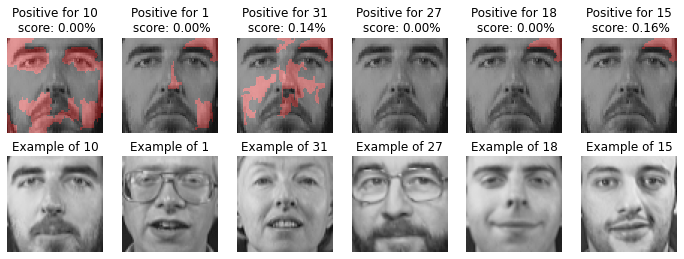

In [ ]:
# 하나의 인물에 대한 부가 설명을 출력

olivetti_test_index=20

fig, m_axs = plt.subplots(2, 6, figsize=(12, 4))

for i, (c_ax, gt_ax) in zip(exp.top_labels, m_axs.T):
  temp, mask = exp.get_image_and_mask(i,
                                      positive_only=True,
                                      num_features=12,
                                      hide_rest=False,
                                      min_weight=0.001)
  
  c_ax.imshow(label2rgb(mask, temp, bg_label = 0), interpolation='nearest')

  c_ax.set_title(f"Positive for {i}\n score: {(100*pipe_pred_prob[olivetti_test_index, i]):.2f}%")
  c_ax.axis('off')


  face_id = np.random.choice(np.where(y_train==i)[0])

  gt_ax.imshow(X_train[face_id])
  gt_ax.set_title(f"Example of {i}")
  gt_ax.axis('off')

제대로 구분하지 못하는 경우는 모델이 이미지들을 구분하기 위해 주사한 부분이 거의 같은 것을 확인할 수 있다.

따라서 두 인물을 더욱 잘 구분하려면 학습 알고리즘을 바꿔서 실험하거나, 사물이 잘 구분되는 각도나 빛의 방향을 찾아 학습용 데이터셋을 늘려야 한다는 결론을 유추할 수 있다.

이를 기반으로 증거에 기반을 둔 돌파구를 고려해야 한다.

## 5-3 SHAP(SHapley Additive exPlanations)

### 5-3-1 배경 이론

- 로이드 섀플리가 만든 이론 위에 피처 간 독립성을 근거로 덧셈(addition)이 가능하게 활용도를 넗힌 논문
- 섀플리 값(Shapley value)과 피처 간 독립성을 핵심 아이디어
- 새플리 값은 전체 성과를 창출하는 데 각 참여자가 얼마나 공헌했는지를 수치화한 값
- 기여도는 전체 기여도에서 그사람의 기여도를 제외했을 때 성과의 변화로 측정 가능

다음 수식으로 측정이 가능하다

$ \phi_i{(v)} = \sum_{S \in N/{i}}{\frac{|S|!(n-|S|-1)!}{n!}(v(S \cup {i}) -v(S))} $


- SHAP는 모델의 출력을 각 피처의 기여도로 분해한다.
- $ \phi_0$ 은 모든 피처 정보로 예측을 수행한 평균 기댓값
- $ \phi_n$ 은 n피처가 f(x)에 기여하는 정도이다.
- 특정 피처가 모델 예측에 기여하는 정도를 표시할 수 있다.


SHAP는 피처 중요도와 유사해 보이는 특징이 있다. 하지만
- 피처 간 의존성까지 고려해서 모델 영향력을 계산한다.
- 이 때문에 계산 시간이 오래 걸린다(결측값을 시뮬레이션 하기 때문)
- SHAP는 학습된 모델에 대해서만 설명할 수 있다.
- 피처의 추가와 삭제가 빠른 모델을 설명하기에 적합하지 않다.


SHAP는 (1) 피처 간 중요도와 (2) 부분 의존성 플롯과 유사한 특징을 가진다.
- 피처 중요도는 피처들이 서로 의존적이라면 피처 영향력이 잘못 계산될 수 있다.
- 부분 의존성 플롯은 특정 피처가 변할 때 집값에 어떤 영향을 미치는지 시각화할 수 있지만, 피처가 많아지면 시각화하기 어렵고, 영향력이 과대평가 될 수 있다.
- SHAP는 피처를 균형 있게 해석한다. 하지만 시간이 오래 걸려고, outlier에 대해 특이한 해석을 내 놓을 가능성이 높다.
- (1) (2) 는 모델의 관점에 대한 설명이지만 (3)은 데이터 하나에 대한 설명을 구한다는 점에서 차이가 있다.


### 5-3-2 실습 4 : 공유 경제 스타트업에서 섀플리 값 사용하기

공유 운송 수단을 이용한 대가로 지급한 요금은 다음과 같다.

|사용자|요금(원)|
|---:|---:|
|A|10,000|
|B|30,000|
|C|5,000|
|A,B|50,000|
|A,C|40,000|
|B,C|35,000|
|A,B,C|100,000|

- 이용자 C와 B를 비교하면 6배나 요금 차이나 난다.
- A,B가 합승할 때는 어떤 비중으로 요금을 분배?



In [ ]:
|